# Работа с данными

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

cases = pd.read_csv('src/cases.csv',sep=';')
cases['Номер поручения']=cases['\ufeffНомер поручения']
marks = pd.read_csv('src/marks.csv',sep=';')
diaries = pd.read_csv('src/diaries.csv',sep=';')

In [2]:
diaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Номер поручения    888 non-null    int64 
 1   Герой              888 non-null    object
 2   Запись в дневнике  888 non-null    object
 3   Затрачено часов    888 non-null    object
 4   Роль               888 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.8+ KB


In [141]:
# Переведём в числовой формат время выполнения задачи
diaries["Затрачено часов"] = diaries["Затрачено часов"].replace({r'[,]': '.'}, regex=True)
diaries['Затрачено часов']=diaries['Затрачено часов'].astype(float)

In [5]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ﻿Номер поручения      500 non-null    int64  
 1   Заказчик              500 non-null    object 
 2   Дата поручения        500 non-null    object 
 3   Выполнено             500 non-null    object 
 4   Дата выполнения       481 non-null    object 
 5   Затрачено дней        481 non-null    float64
 6   Сумма вознаграждения  500 non-null    int64  
 7   Описание              500 non-null    object 
 8   Номер поручения       500 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 35.3+ KB


In [6]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Номер поручения       500 non-null    int64 
 1   Герой                 500 non-null    object
 2   Оценка за качество    500 non-null    int64 
 3   Оценка по срокам      500 non-null    int64 
 4   Оценка за вежливость  500 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.7+ KB


Рассмотрим распределения, возможно там будет что-то интересное

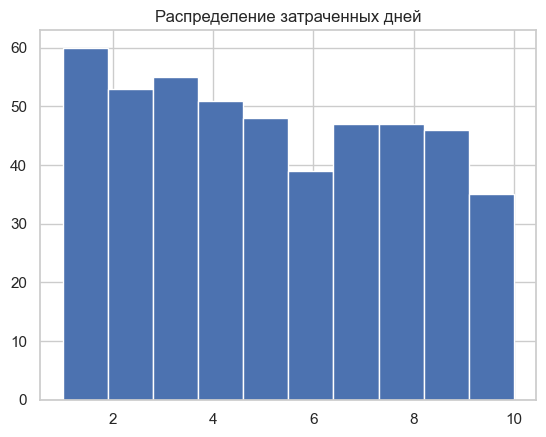

In [12]:
cases['Затрачено дней'].hist()
plt.title('Распределение затраченных дней')
plt.show()

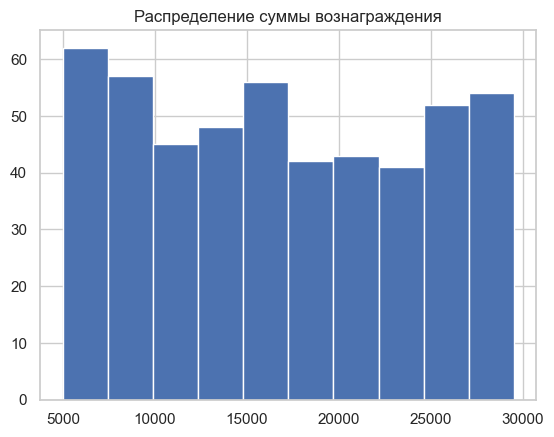

In [13]:
cases['Сумма вознаграждения'].hist()
plt.title('Распределение суммы вознаграждения')
plt.show()

Есть 3 группы: низкооплачиваемые задания, средние и высокооплачиваемые.

### Работа с diaries

In [2]:
diaries['Роль'].unique()

array(['рейнджер', 'следопыт', 'лекарь', 'лучник', 'мечник', 'боевой маг'],
      dtype=object)

<Axes: >

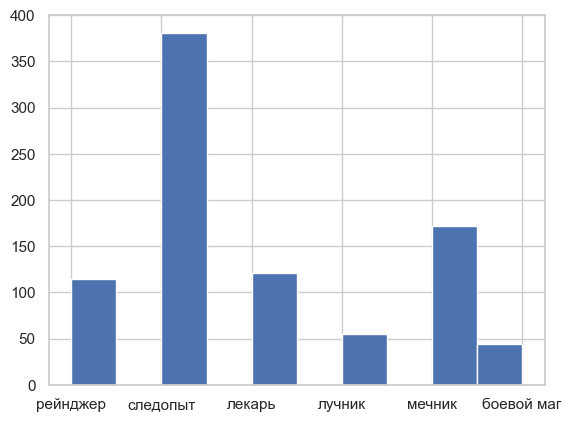

In [14]:
diaries['Роль'].hist()

In [3]:
diaries['Запись в дневнике'].unique()

array(['разжечь костёр', 'выследить цель', 'залечить раны',
       'найти пропажу', 'отыскать заказчика'], dtype=object)

<Axes: >

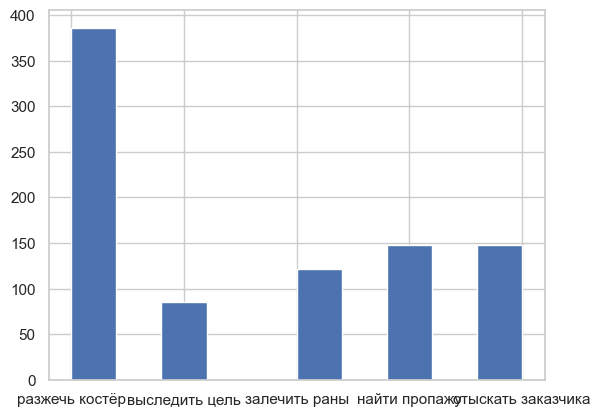

In [15]:
diaries['Запись в дневнике'].hist()

In [4]:
diaries['Герой'].unique()

array(['Мартин', 'Альфред', 'Юлия', 'Агата', 'Фредерик', 'Соня',
       'Пастушок', 'Леопольд', 'Бендер', 'Глюкоза', 'Бенедикт',
       'Синеглазый'], dtype=object)

Посмотрим какие предпочтения у героев, кто в какой роли чаще

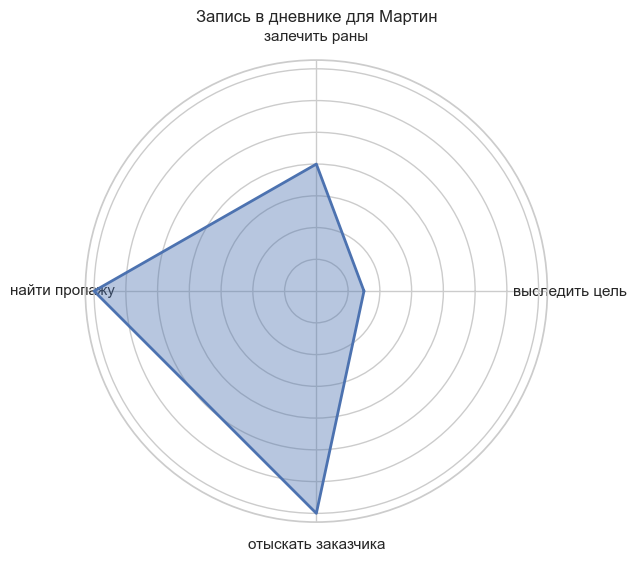

In [ ]:
# Радарная диаграмма для записей в дневнике для каждого героя
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Уникальные герои и действия, исключая "разжечь костёр"
heroes = diaries['Герой'].unique()
actions = [action for action in diaries['Запись в дневнике'].unique() if action != 'разжечь костёр']

# Функция для построения радарной диаграммы для каждого героя
def plot_radar(hero):
    # Подсчитываем частоту действий для героя, исключая "разжечь костёр"
    hero_actions = diaries[(diaries['Герой'] == hero) & (diaries['Запись в дневнике'] != 'разжечь костёр')]['Запись в дневнике'].value_counts()
    hero_data = [hero_actions.get(action, 0) for action in actions]
    
    # Подготовка данных для построения радарной диаграммы
    angles = np.linspace(0, 2 * np.pi, len(actions), endpoint=False).tolist()
    hero_data += hero_data[:1]  # Замыкаем круг
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, hero_data, linewidth=2, linestyle='solid')
    ax.fill(angles, hero_data, alpha=0.4)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(actions)
    ax.set_title(f'Запись в дневнике для {hero}')

    plt.show()

plot_radar('Мартин')

# Построение диаграммы для каждого героя
# for hero in heroes:
#     plot_radar(hero)


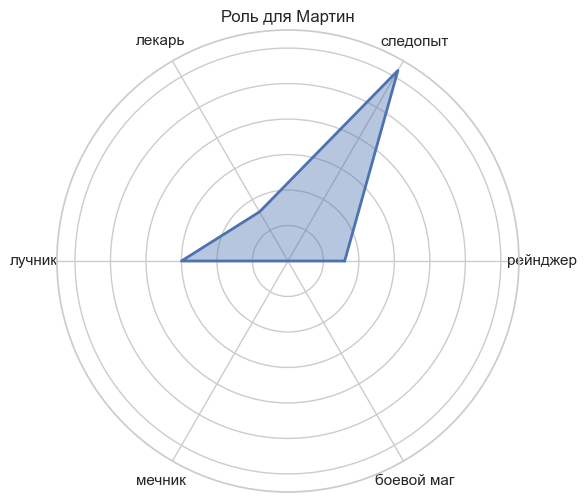

In [5]:
# Радарная диаграмма для ролей каждого героя
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Уникальные герои и действия, исключая "разжечь костёр"
heroes = diaries['Герой'].unique()
actions = diaries['Роль'].unique()

# Функция для построения радарной диаграммы для каждого героя
def plot_radar(hero):
    # Подсчитываем частоту действий для героя, исключая "разжечь костёр"
    hero_actions = diaries[diaries['Герой'] == hero]['Роль'].value_counts()
    hero_data = [hero_actions.get(action, 0) for action in actions]
    
    # Подготовка данных для построения радарной диаграммы
    angles = np.linspace(0, 2 * np.pi, len(actions), endpoint=False).tolist()
    hero_data += hero_data[:1]  # Замыкаем круг
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, hero_data, linewidth=2, linestyle='solid')
    ax.fill(angles, hero_data, alpha=0.4)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(actions)
    ax.set_title(f'Роль для {hero}')

    plt.show()

plot_radar('Мартин')

# Построение диаграммы для каждого героя
# for hero in heroes:
#     plot_radar(hero)


#### Можно ли выполнять задание (заметку) в разных ролях?

In [81]:
# Группируем данные по номеру поручения и проверяем количество уникальных ролей в каждой группе
roles_per_mission = diaries.groupby('Номер поручения')['Роль'].nunique()

# Отбираем только те поручения, где есть более одной уникальной роли
missions_with_multiple_roles = roles_per_mission[roles_per_mission > 1]

# Выводим результаты
if not missions_with_multiple_roles.empty:
    print("Номера поручений с разными ролями:")
    print(missions_with_multiple_roles)
else:
    print("Для каждого поручения указана только одна роль.")


Номера поручений с разными ролями:
Номер поручения
11000    3
11001    3
11005    2
11006    2
11007    2
        ..
11495    3
11496    3
11497    2
11498    2
11499    2
Name: Роль, Length: 199, dtype: int64


Да, можно. Более того, есть зависимость времени от роли для определённой задачи, а именно для костра. Это видно на графиках ниже

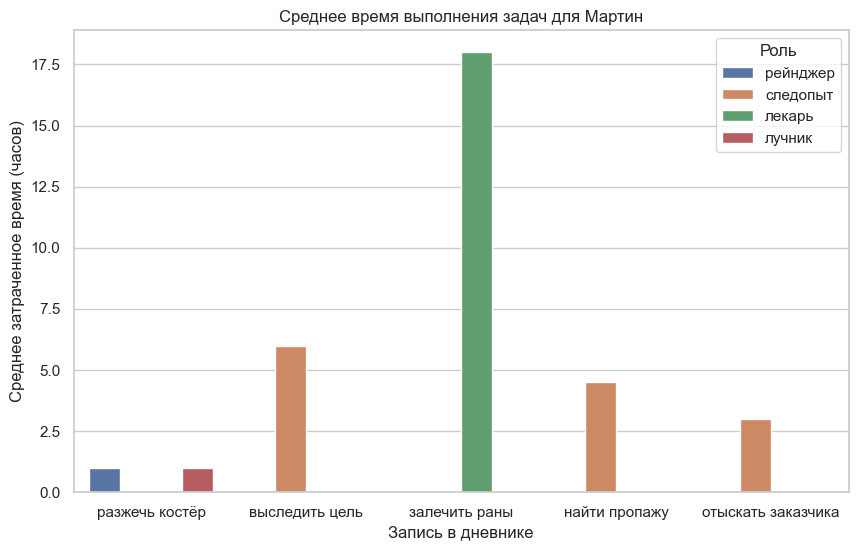

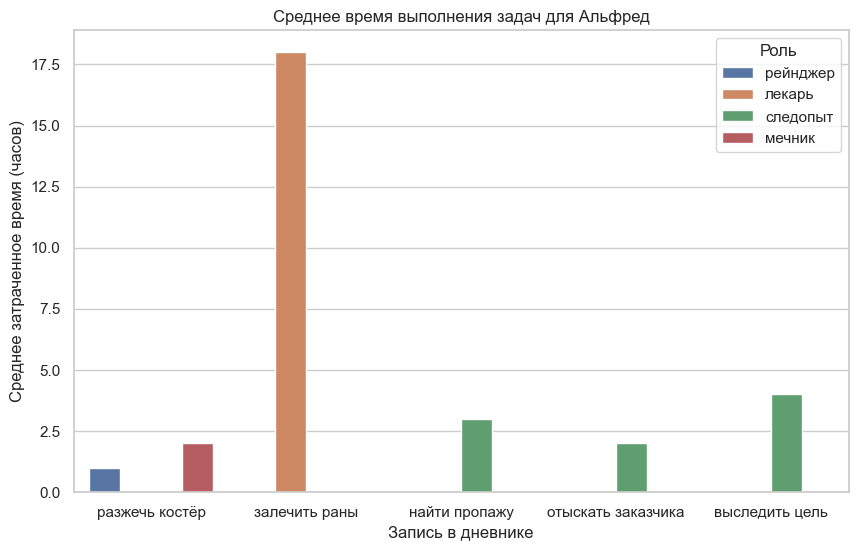

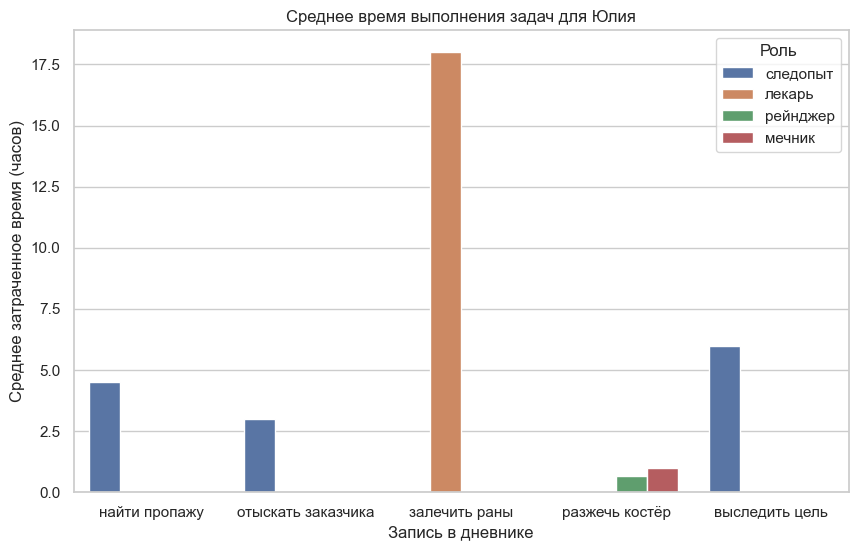

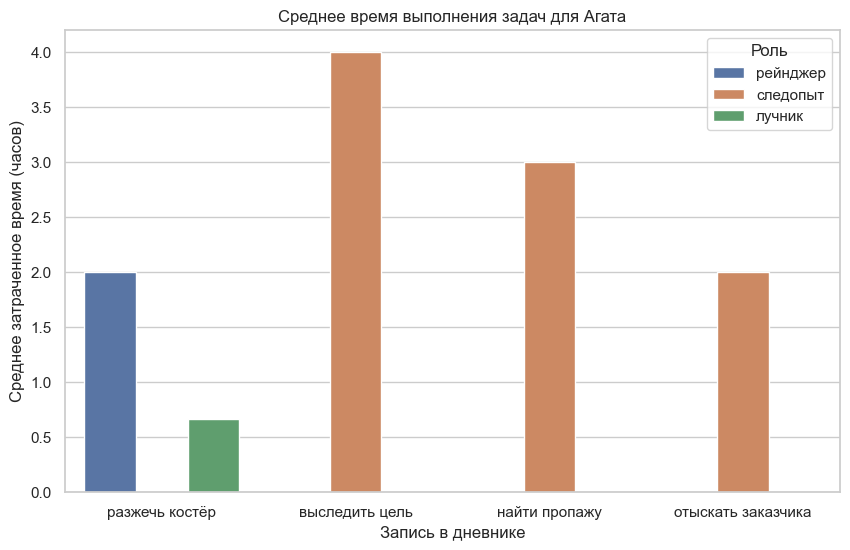

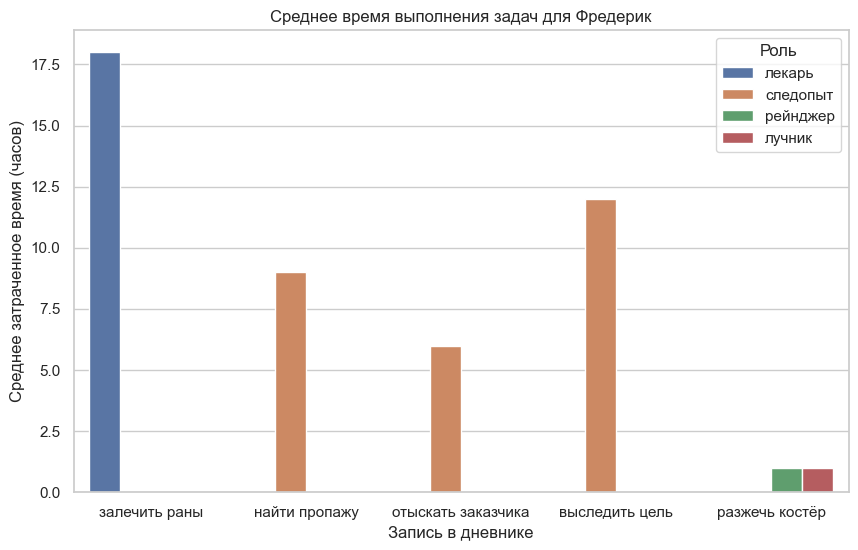

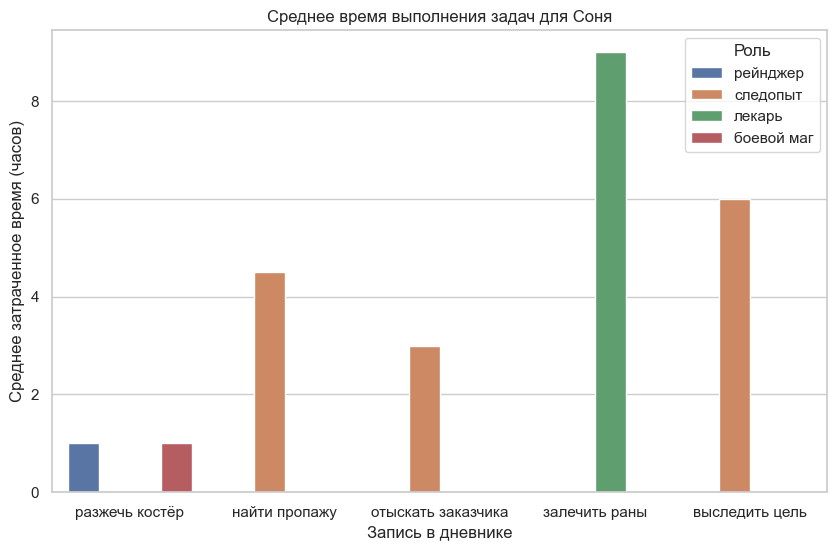

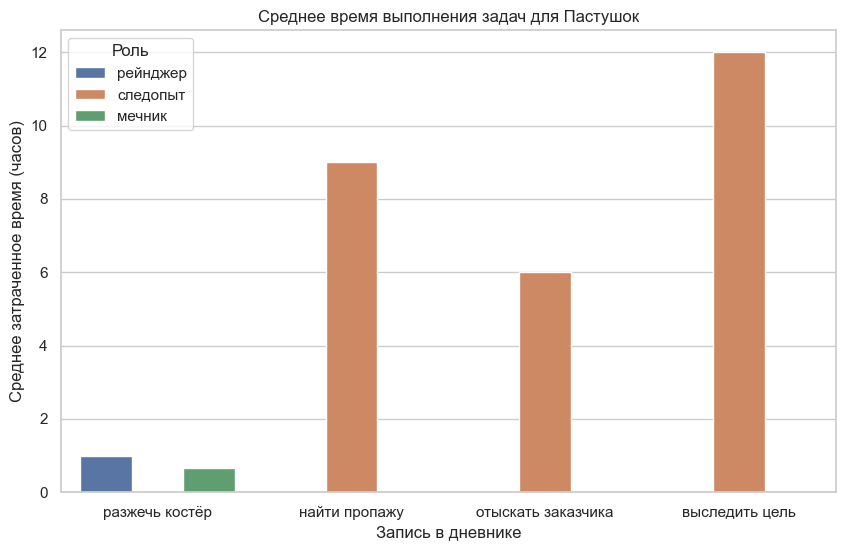

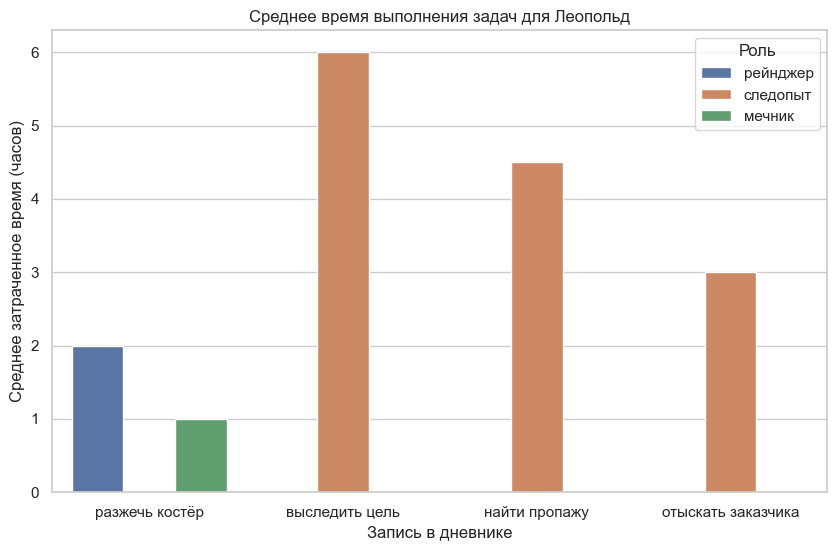

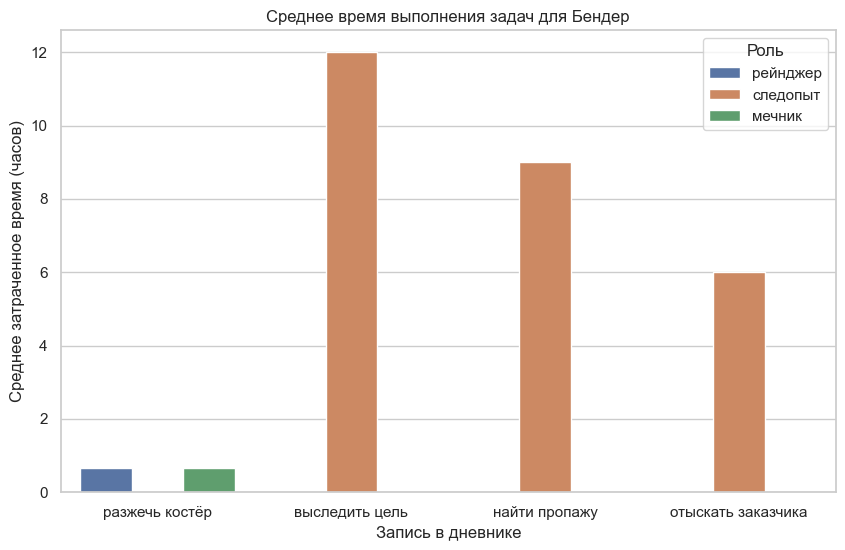

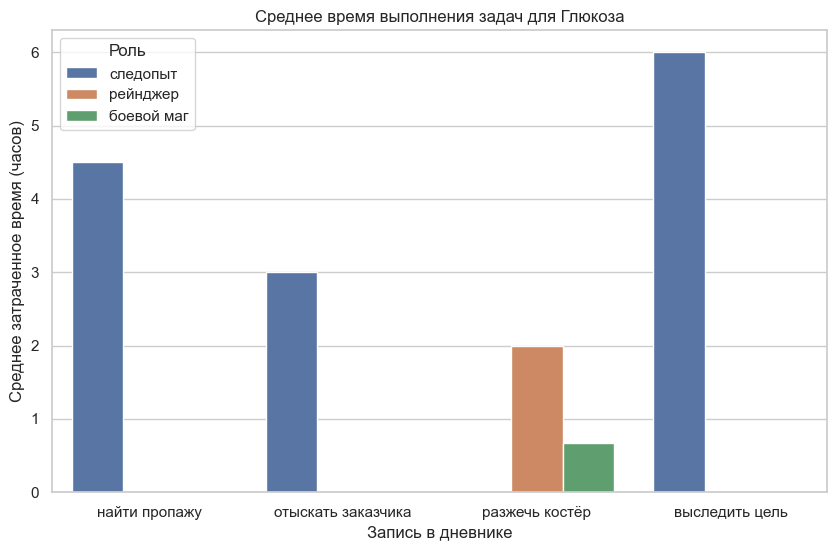

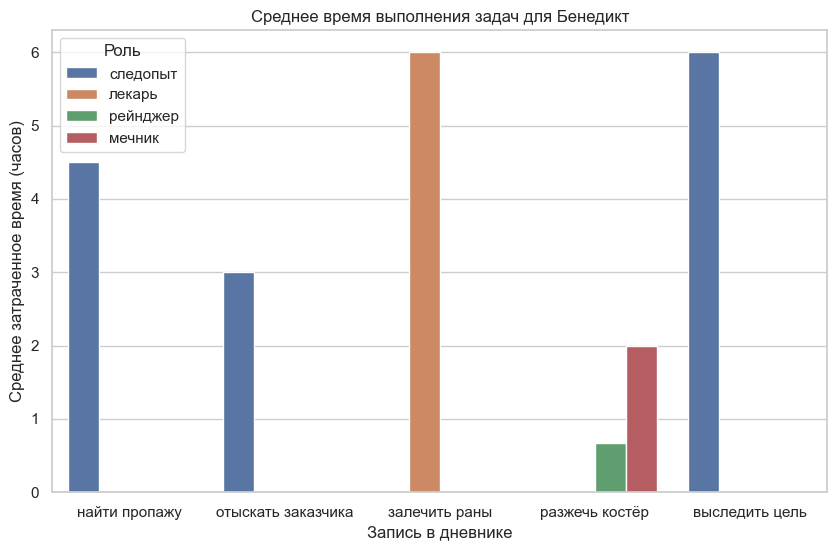

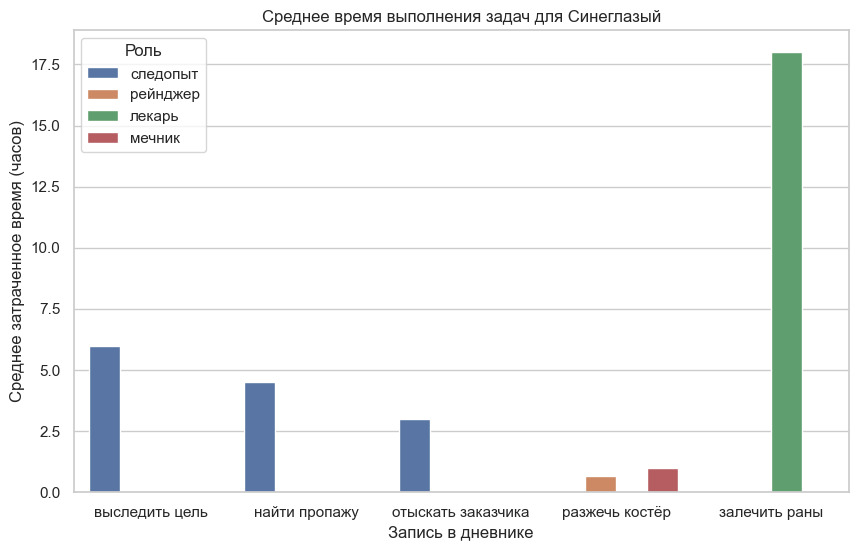

In [6]:
# Столбчатый график зависимости выполнения задач от роли
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля для более красивых графиков
sns.set(style="whitegrid")

# Создание столбчатой диаграммы для каждого героя с расчётом среднего времени
heroes = diaries['Герой'].unique()
for hero in heroes:
    plt.figure(figsize=(10, 6))
    
    # Построение графика с расчётом среднего времени для каждого действия и роли
    sns.barplot(
        x='Запись в дневнике', 
        y='Затрачено часов', 
        hue='Роль', 
        data=diaries[diaries['Герой'] == hero],
        estimator=np.mean
    )
    
    plt.title(f'Среднее время выполнения задач для {hero}')
    plt.xlabel('Запись в дневнике')
    plt.ylabel('Среднее затраченное время (часов)')
    plt.legend(title='Роль')
    plt.show()


Разные роли есть только для разжигания костра. Это не целевое действие, но оно тоже занимает время. У кого-то быстрее в роли мечника, у кого-то в роли рейнджера. Нужно это учитывать при оптимизации времени.

## Работа с Marks 

In [8]:
# Рассчитываем корреляцию между столбцами 'Оценка по срокам' и 'Затрачено дней'
correlation = marks["Оценка по срокам"].corr(cases["Затрачено дней"])

print("Корреляция между 'Оценка по срокам' и 'Затрачено дней':", correlation)


Корреляция между 'Оценка по срокам' и 'Затрачено дней': -0.08684759040671543


<Axes: >

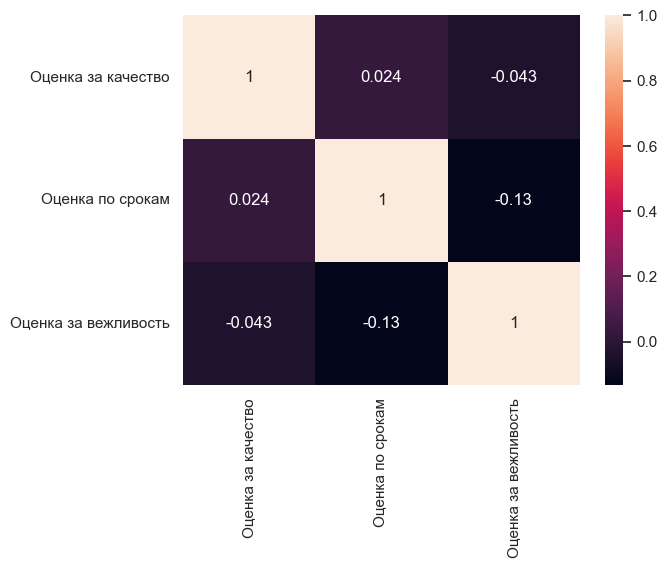

In [26]:
# посмотрим на матрицу корреляций датафрейма marks
import seaborn as sns

corr = marks[['Оценка за качество','Оценка по срокам','Оценка за вежливость']].corr()
sns.heatmap(corr,annot=True)

Кореляция слабая, да и более того отрицательная. Не будем её особо брать во внимание.

Посмотрим нам опытность героев, у кого больше выполненных заказов.

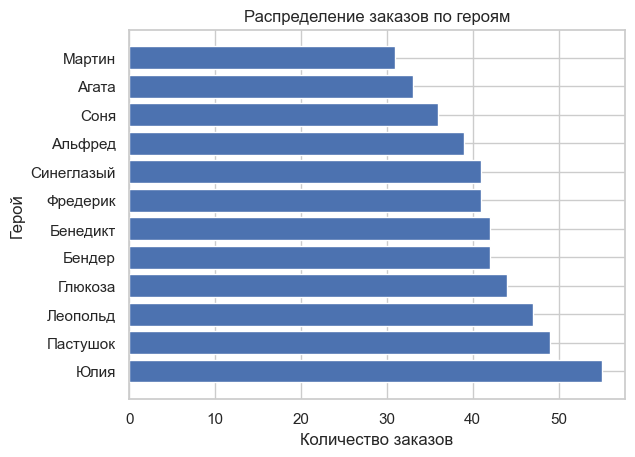

In [24]:
import matplotlib.pyplot as plt

counts = marks['Герой'].value_counts()

plt.barh(counts.index, counts.values)
plt.title('Распределение заказов по героям')
plt.xlabel('Количество заказов')
plt.ylabel('Герой')
plt.show()

## Работа с cases 

In [142]:
# Функция для преобразования дат
def safe_parse_date(date_str):
    try:
        return datetime.strptime(date_str, "%Y-%m-%d")
    except ValueError:
        return None  
cases['Дата поручения']=cases['Дата поручения'].apply(safe_parse_date)
cases=cases.sort_values(by='Дата поручения').reset_index(drop=True)

Рассмотрим временные ряды от вознаграждения и затраченных дней. Возможно есть явные просадки, когда дела выполнялись дольше обычного, либо стоили больше

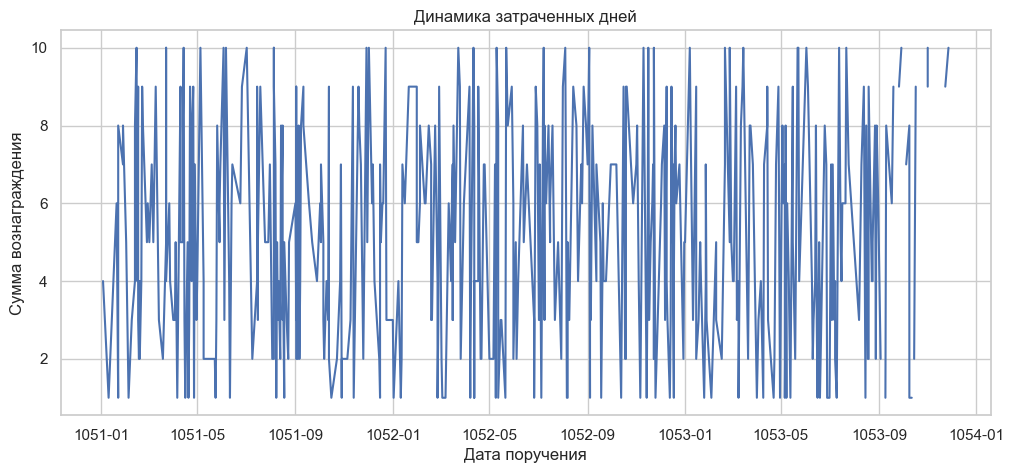

In [42]:
# Построение линейного графика
plt.figure(figsize=(12, 5))
plt.plot(cases['Дата поручения'], cases['Затрачено дней'])
plt.xlabel('Дата поручения')
plt.ylabel('Сумма вознаграждения')
plt.title('Динамика затраченных дней')
plt.show()

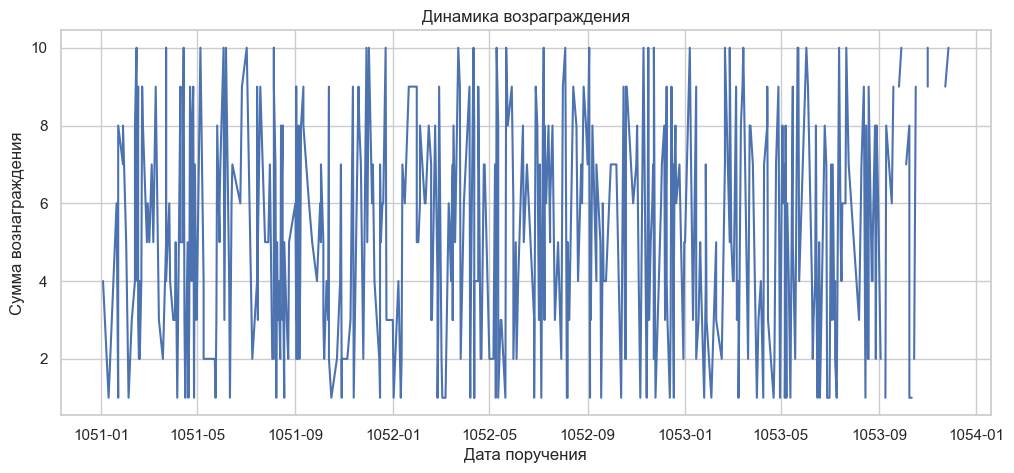

In [43]:
plt.figure(figsize=(12, 5))
plt.plot(cases['Дата поручения'], cases['Затрачено дней'])
plt.xlabel('Дата поручения')
plt.ylabel('Сумма вознаграждения')
plt.title('Динамика возраграждения')
plt.show()

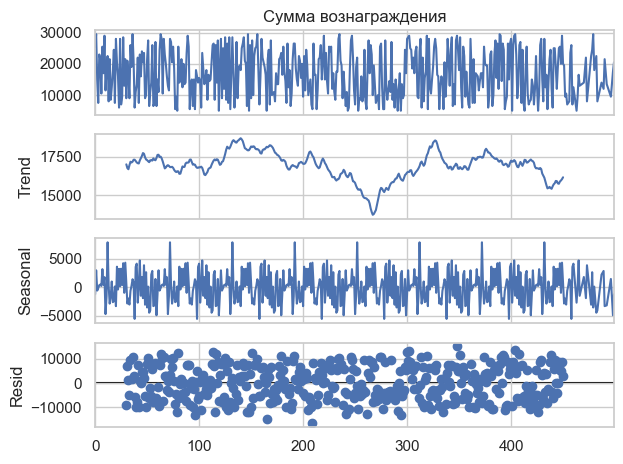

In [52]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
# Выполним декомпозицию временного ряда
decomposition = seasonal_decompose(cases[cases['Выполнено']=='да']['Сумма вознаграждения'], model='additive', period=60) 
decomposition.plot();

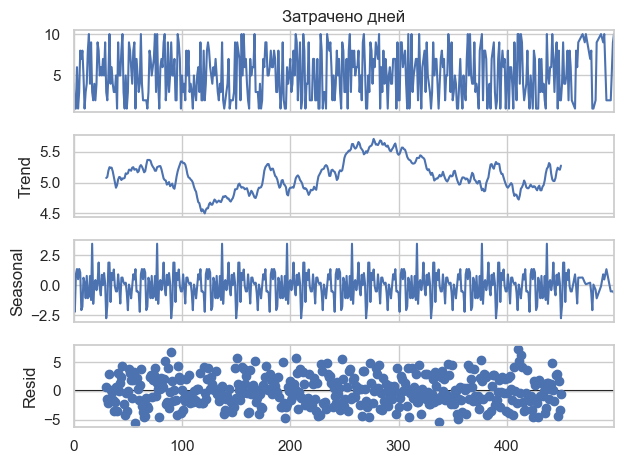

In [51]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
# Выполним декомпозицию временного ряда
decomposition = seasonal_decompose(cases[cases['Выполнено']=='да']['Затрачено дней'], model='additive', period=60) 
decomposition.plot();

Недостаточно доказательств, что есть какаие-то значимые изменения во временном ряде.

## Работа с описанием

Описание представляет собой сборище предложений, которые должны быть разделимы на различные кластеры. 

Описание может помочь разделить задачи на кластеры, выявить такие действия, которые нужны для задачи больше всего (или в целом) и определить наиболее подходящих героев по этим задачам.

Для этого сначала нужно обработать текст предложений, лемматизовать их и попробовать кластеризовать.

In [3]:
# Посмотрим все ли предложения разные или есть повторяющиеся

cases['Описание'].nunique()

243

- Отлично, у нас всего 243 уникальных описания. 

Выделим нужные признаки и будем работать с ними далее

In [143]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from natasha import Doc, Segmenter, NewsMorphTagger, NewsEmbedding, MorphVocab
import nltk
from nltk.corpus import stopwords


# Загрузка русских стоп-слов
nltk.download('stopwords')
stop_words = stopwords.words('russian')

# Настройка для лемматизации с помощью Natasha
segmenter = Segmenter()
morph_tagger = NewsMorphTagger(NewsEmbedding())
morph_vocab = MorphVocab()

def lemmatize_text_natasha(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
    return ' '.join([token.lemma for token in doc.tokens])

cases['lemm']=cases['Описание'].fillna('').apply(lemmatize_text_natasha)
data_for_emb = cases['lemm'].unique()

# Устанавливаем нужные библиотеки
from sentence_transformers import SentenceTransformer
import numpy as np

# Загружаем предобученную модель Sentence-BERT
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Легкая и быстрая модель

# Генерируем эмбеддинги для каждого предложения в столбце 'lemm'
embeddings = model.encode(data_for_emb)

# Преобразуем в массив numpy для последующей кластеризации
embeddings = np.array(embeddings)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Эмпирическим путём было выбрано число кластеров равное 4, а также кластеризация методом LDA 

In [144]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Преобразуем тексты в матрицу TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data_for_emb)

# Инициализируем и обучаем LDA
lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(tfidf_matrix)

# Получаем распределение тем для каждого текста
lda_labels = lda.transform(tfidf_matrix)
topic_assignments = lda_labels.argmax(axis=1)

# Создаем DataFrame для анализа
data = pd.DataFrame({'text': data_for_emb, 'topic': topic_assignments})
# Получаем уникальные описания и их индексы
unique_lemm = cases['lemm'].unique()

# Создаем DataFrame для сопоставления уникальных описаний с метками кластеров
cluster_labels = pd.DataFrame({'lemm': unique_lemm, 'cluster': topic_assignments})

# Присоединяем метки кластеров к исходному датафрейму
cases = cases.merge(cluster_labels, on='lemm', how='left')

In [43]:
cases[cases['cluster']==0][['cluster','Описание']]

,cluster,Описание
4,0,В деревне у меня пропала сумка с документами. ...
8,0,Недалеко от города у меня потерялась драгоценн...
19,0,В городе у меня пропала сумка с документами. Н...
23,0,В деревне у меня потерялся рюкзак. Нужно найти...
25,0,В деревне у меня была украдена сумка с докумен...
...,...,...
481,0,В городе у меня потерялась драгоценность. Нужн...
485,0,В деревне у меня был украден рюкзак. Нужно вер...
486,0,В деревне у меня пропал рюкзак. Нужно вернуть ...
492,0,По дороге из деревни у меня была украдена драг...


Пристальным взглядом замечено, что некоторые типичные поручения просачиваются в другие кластеры. Выведем записи по кластерам в отдельные файлы и просмотрим их. Исходя из рассмотренных данных сформируем новые кластеры.

In [ ]:
with open("additional_data/0_кластер.txt", "w") as f:
    for item in cases[cases['cluster'] == 0][['cluster', 'Описание']].values.tolist():
        f.write("%s\n" % item)

with open("additional_data/1_кластер.txt", "w") as f:
    for item in cases[cases['cluster'] == 1][['cluster', 'Описание']].values.tolist():
        f.write("%s\n" % item)

with open("additional_data/2_кластер.txt", "w") as f:
    for item in cases[cases['cluster'] == 2][['cluster', 'Описание']].values.tolist():
        f.write("%s\n" % item)

with open("additional_data/3_кластер.txt", "w") as f:
    for item in cases[cases['cluster'] == 3][['cluster', 'Описание']].values.tolist():
        f.write("%s\n" % item)

В ходе поиска оптимального разбиения было замечено, что при увеличении количества кластеров, объекты начинают просачиваться в другие кластеры. Другие типы кластеризации не дали лучшего результата, поэтому был выбран метод LDA. Также было определено, что лучшее разбиение по кластерам следующиее: 

- 0 группа. Зачистка. Нужно прогнать, уничтожить, проучить врагов
- 1 группа. Поиск пропажи. Найти вещь
- 2 группа. Найти пропавших людей
- 3 группа. Опасные враги. Все записи, где упоминается про опасность. Хоть это и не гарантия, но сделаем допущение, что слова правдидвы и лучше остерегаться
- 4 нужно не только уничтожить врагов, но и найти их

Используем ключевые слова для определения группы

In [145]:
# Список ключевых слов для каждой группы
keywords = {
    1: ['пропасть', 'потеряться', 'украсть', 'драгоценность','сумка','рюкзак'],
    2: ['похитить ', 'путник', 'освободить','спасти'],
    3: ['опасный'],
    4: ['найти зверь','найти монстр','найти разбойник','найти разбойник',],
    
    # Добавьте другие группы и ключевые слова по необходимости
}

# Функция для определения группы на основе наличия ключевых слов
def assign_group(description):
    for group, words in keywords.items():
        if any(word in description for word in words):
            return group
    return 0  # Если ни одно слово не найдено, помечаем как 0 (нет группы)

# Применяем функцию к столбцу 'Описание' и создаем новый столбец 'group'
cases['group'] = cases['lemm'].apply(assign_group)
del cases['cluster']
del cases['lemm']

Теперь можем приступить к проектированию рекомендательной системы

# Проектирование рекомендательной системы

Для начала нужно решить несколько вопросов:
1) На какие данные о героях будет опираться рексис?
2) По каким критериям будет собираться команда?
3) Как рассчитывать длительность выполнения задания?
4) Как избежать пересечения даты выдачи нового задания и завершения старого для одного героя?

Начнём постепенно решать вопросы. Сначала сформируем данные о героях.

## Таблицы профилей героев
Сначала сформируем общую таблицу all_data, которая будет содержать все данные за исключением записей diaries, так как там на одно поручение может быть несколько записей.

In [279]:
all_data = pd.merge(cases, marks, on='Номер поручения', how='left')
all_data.to_csv('additional tables/all_data.csv')

Создадим таблицу, в которой будут средние оценки для каждого героя в зависимости от группы и сохраним эту таблицу в директорию additional tables

In [150]:
# Группируем данные по герою и группе, вычисляя средние значения и количество для каждого показателя
grouped = (
    all_data.groupby(['Герой', 'group'])[['Оценка за качество', 'Оценка по срокам', 'Оценка за вежливость','Затрачено дней']]
    .agg('mean')
)
# "Расплавляем" MultiIndex столбцы и "вытягиваем" данные в строку, как при one-hot encoding
hero_marks_mean = grouped.reset_index()
hero_marks_mean.to_csv('additional tables/hero_marks_mean.csv', index=False)

In [57]:
hero_marks_mean

,Герой,group,Оценка за качество,Оценка по срокам,Оценка за вежливость,Затрачено дней
0,Агата,0,3.916667,3.416667,4.583333,5.166667
1,Агата,1,3.818182,3.909091,4.090909,5.555556
2,Агата,2,4.000000,3.400000,3.200000,6.250000
3,Агата,3,4.666667,4.666667,3.666667,3.333333
4,Агата,4,3.500000,4.000000,2.500000,4.500000
5,Альфред,0,3.941176,3.529412,3.764706,4.823529
6,Альфред,1,3.428571,3.285714,4.285714,7.166667
7,Альфред,2,4.166667,4.000000,4.000000,5.666667
8,Альфред,3,4.142857,4.142857,3.714286,5.428571
9,Альфред,4,3.000000,4.000000,4.000000,4.500000


Помним, что каждый герой затрачивает разное время на каждое действие, некоторые не умеют быть в какой-либо роли, поэтому будем использовать эту информацию. Составим таблицу, где сосчитано среднее количество часов на выполнение определённого действия. 

Вспомним, что с действием "разжечь костёр" герои справляются в разныз ролях, поэтому если герой использует для этого действия разные роли, будем выбирать ту, в которой он затрачивает наименьшее время в среднем и считать показатель по ней.

Показатель - обращённое число для сохранения логики: чем меньше времени затрачено, тем лучше.

In [151]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Исходные данные
# Здесь подключение ваших таблиц `diaries`

# Действия для общей таблицы
actions = ['выследить цель', 'залечить раны', 'найти пропажу', 'отыскать заказчика']

# Фильтрация по целевым действиям
filtered_diaries = diaries[diaries['Запись в дневнике'].isin(actions)]

# Группировка по 'Герой' и 'Запись в дневнике', вычисление среднего по 'Затрачено часов'
average_hours = filtered_diaries.groupby(['Герой', 'Запись в дневнике'])['Затрачено часов'].mean().unstack()
average_hours.columns.name = None  # Убираем имя индекса
average_hours.reset_index(inplace=True)
average_hours.fillna(0, inplace=True)

# Инвертирование значений и нормализация
average_hours = 1 / average_hours.set_index('Герой').replace(0, float('nan'))
scaler = MinMaxScaler(feature_range=(1, 5))
scaled_values = scaler.fit_transform(average_hours)
scaled_average_hours = pd.DataFrame(scaled_values, columns=average_hours.columns, index=average_hours.index)
scaled_average_hours.reset_index(inplace=True)
scaled_average_hours.fillna(0, inplace=True)

# Минимальные значения для действия "разжечь костёр" по ролям
filtered_diaries_bonfire = diaries[diaries['Запись в дневнике'] == 'разжечь костёр']
average_bonfire = filtered_diaries_bonfire.groupby(['Герой', 'Роль'])['Затрачено часов'].mean().reset_index()

# Выбор роли с минимальным средним значением по каждому герою для "разжечь костёр"
min_bonfire_role = average_bonfire.loc[average_bonfire.groupby('Герой')['Затрачено часов'].idxmin()]
min_bonfire_role = min_bonfire_role.rename(columns={ 'Роль': 'Роль (разжечь костёр)','Затрачено часов': 'разжечь костёр'})

# Объединение таблиц по 'Герой'
hero_abilities = pd.merge(scaled_average_hours, min_bonfire_role[['Герой','разжечь костёр','Роль (разжечь костёр)']], on='Герой', how='left')
# Инвертирование значений (где значения не равны нулю)
hero_abilities['разжечь костёр'] = 1 / hero_abilities['разжечь костёр'].replace(0, float('nan'))

# Применение Min-Max нормализации к столбцу "разжечь костёр"
scaler = MinMaxScaler(feature_range=(1, 5))
hero_abilities['разжечь костёр'] = scaler.fit_transform(hero_abilities[['разжечь костёр']])*0.5 #понижаю значимость признака, так как само действие не важное, но может вносить сильный вклад в выбор персонажа
hero_abilities.to_csv('additional tables/hero_abilities.csv')


In [152]:
hero_abilities

,Герой,выследить цель,залечить раны,найти пропажу,отыскать заказчика,разжечь костёр,Роль (разжечь костёр)
0,Агата,5.0,0.0,5.0,5.0,2.5,лучник
1,Альфред,5.0,1.0,5.0,5.0,0.5,рейнджер
2,Бендер,1.0,0.0,1.0,1.0,2.5,мечник
3,Бенедикт,3.0,5.0,3.0,3.0,2.5,рейнджер
4,Глюкоза,3.0,0.0,3.0,3.0,2.5,боевой маг
5,Леопольд,3.0,0.0,3.0,3.0,0.5,мечник
6,Мартин,3.0,1.0,3.0,3.0,0.5,лучник
7,Пастушок,1.0,0.0,1.0,1.0,2.5,мечник
8,Синеглазый,3.0,1.0,3.0,3.0,2.5,рейнджер
9,Соня,3.0,3.0,3.0,3.0,0.5,боевой маг


Итак мы получили две таблицы для профилей героев. Одна отражает оценки героев, вторая - фактические хард скиллы. 

Далее рассмотрим критерии для выбора кандидата на задание

## Проверка влияния факторов на оценку за задание

Предположим, что чем выше сумма вознаграждения, тем сложнее задание. Однако это уже слабая гипотеза, так как в данных нет поручений, которые выполняла команда, а не один герой, поэтому не с чем сравнить. Оценим корреляцию

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

# Список для хранения результатов
results = []

# Проход по каждому уникальному герою
for hero in all_data['Герой'].unique():
    hero_data = all_data[all_data['Герой'] == hero]
    
    # Проверим наличие достаточного количества данных
    if len(hero_data) > 1:
        # Рассчитаем корреляцию Пирсона для каждого параметра оценки
        quality_corr, quality_p = pearsonr(hero_data['Сумма вознаграждения'], hero_data['Оценка за качество'])
        time_corr, time_p = pearsonr(hero_data['Сумма вознаграждения'], hero_data['Оценка по срокам'])
        politeness_corr, politeness_p = pearsonr(hero_data['Сумма вознаграждения'], hero_data['Оценка за вежливость'])
        
        # Выполним линейную регрессию, чтобы получить коэфф., показывающие влияние суммы вознаграждения на оценку
        X = sm.add_constant(hero_data['Сумма вознаграждения'])  # Добавляем константу
        y_quality = hero_data['Оценка за качество']
        y_time = hero_data['Оценка по срокам']
        y_politeness = hero_data['Оценка за вежливость']
    
        model_quality = sm.OLS(y_quality, X).fit()
        model_time = sm.OLS(y_time, X).fit()
        model_politeness = sm.OLS(y_politeness, X).fit()
        
        results.append({
            'Герой': hero,
            'Корреляция с качеством': quality_corr,
            'p-value качества': quality_p,
            'Коэффициент влияния на качество': model_quality.params['Сумма вознаграждения'],
            'Корреляция со сроками': time_corr,
            'p-value сроков': time_p,
            'Коэффициент влияния на сроки': model_time.params['Сумма вознаграждения'],
            'Корреляция с вежливостью': politeness_corr,
            'p-value вежливости': politeness_p,
            'Коэффициент влияния на вежливость': model_politeness.params['Сумма вознаграждения']
        })
results_df = pd.DataFrame(results)
results_df


,Герой,Корреляция с качеством,p-value качества,Коэффициент влияния на качество,Корреляция со сроками,p-value сроков,Коэффициент влияния на сроки,Корреляция с вежливостью,p-value вежливости,Коэффициент влияния на вежливость
0,Мартин,-0.100485,0.590679,-9.921781e-06,-0.056030,0.764654,-0.000004,-0.063064,0.736093,-6.359539e-06
1,Альфред,0.016155,0.922239,1.711205e-06,0.182049,0.267342,0.000019,0.122342,0.458109,1.386334e-05
2,Бендер,0.180719,0.252080,2.021011e-05,-0.036562,0.818191,-0.000004,0.216616,0.168237,2.511256e-05
3,Юлия,0.032347,0.814641,3.277198e-06,0.021785,0.874562,0.000003,-0.358094,0.007267,-3.897702e-05
4,Агата,0.266616,0.133657,2.326641e-05,0.098714,0.584693,0.000014,-0.120249,0.505047,-1.888644e-05
5,Фредерик,-0.001259,0.993769,-1.264563e-07,0.235399,0.138450,0.000023,0.113885,0.478336,1.091923e-05
6,Пастушок,-0.168305,0.247686,-1.599616e-05,0.032147,0.826434,0.000003,0.029101,0.842663,3.387422e-06
7,Соня,-0.148754,0.386567,-1.940135e-05,-0.156764,0.361216,-0.000015,0.482628,0.002872,4.235081e-05
8,Леопольд,0.043517,0.771478,4.413085e-06,-0.312963,0.032200,-0.000033,0.025448,0.865172,2.527918e-06
9,Глюкоза,-0.018672,0.904243,-1.912444e-06,-0.171330,0.266136,-0.000019,0.110076,0.476895,1.145573e-05


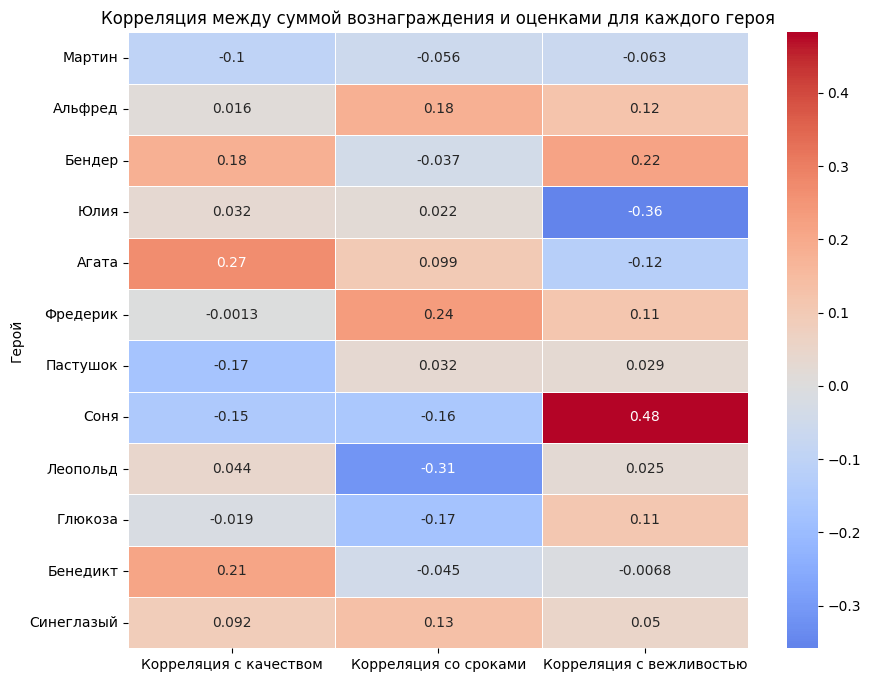

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_df = results_df[['Герой', 'Корреляция с качеством', 'Корреляция со сроками', 'Корреляция с вежливостью']]
corr_df.set_index('Герой', inplace=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Корреляция между суммой вознаграждения и оценками для каждого героя")
plt.show()


Корреляция в целом слабая, частные случаи не говорят о значимых явлениях, тем более в контексте вежливости. Однако любопытно наблюдать высокую корреляцию у Сони и Юли. Можно сделать предположение, что Соня ведёт себя намного милее когда платят больше, а Юля наоборот.

Рассмотрим влияние на оценку затраченных дней и суммы вознаграждения в целом.

<Axes: >

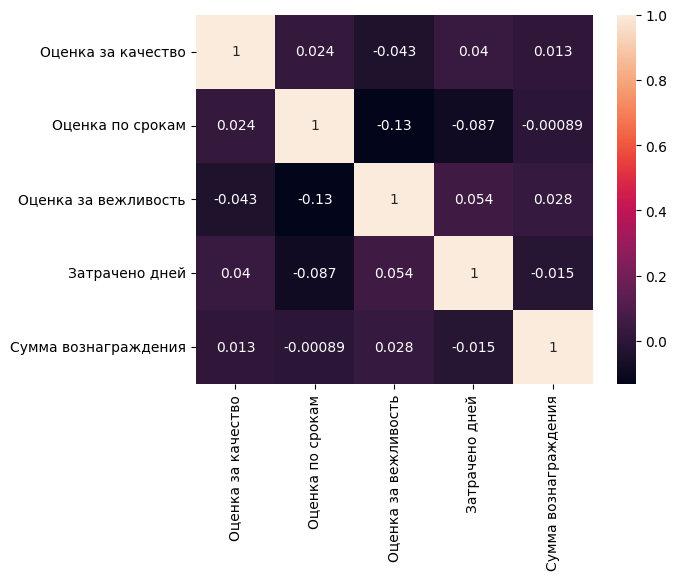

In [62]:
import pandas as pd

# Выборка нужных столбцов
data = all_data[['Оценка за качество', 'Оценка по срокам', 'Оценка за вежливость', 'Затрачено дней', 'Сумма вознаграждения']]

# Рассчёт корреляционной матрицы
correlation_matrix = data.corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)

Ничего интересного не наблюдается. Проведём тест на взаимное влияние двух факторов на оценку по срокам

In [67]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Формула модели: зависимые переменные от независимых
model_formula = 'Q("Оценка по срокам") ~ Q("Затрачено дней") + Q("Сумма вознаграждения")'
anova_model = ols(model_formula, data=all_data[all_data['Выполнено']=='да']).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                               sum_sq     df         F    PR(>F)
Q("Затрачено дней")          2.295460    1.0  3.644894  0.056840
Q("Сумма вознаграждения")    0.031274    1.0  0.049659  0.823752
Residual                   301.032048  478.0       NaN       NaN


В данной задаче не выявлено влияния факторов на оценку, следовательно гипотеза о том, что чем выше вознаграждение, тем выше сложность и тем больше нужно человек для выполнения отвергается. 
Однако в последнем тесте зависимость близка к уровню значимости 0.05, оценка по срокам зависит (с уверенностью меньше 95%) от затраченных дней
- Есть смысл оптимизировать, но неизвестно по какому параметру, так как от суммы вознаграждения не зависит, а количество дней известно постфактум
- К тому же нет прецендентов когда задачу выполняли два и более героев.

Мы знаем, что каждый герой обладает своими навыками, например кто-то имеет навык лекаря,а у кого-то он равен 0 из таблицы hero_abilities. Посмотрим какие целевые действия выполнялись у поручений разных групп, чтобы сформировать список необходимых навыков, которые должен покрывать кандидат или команда кандидатов.

In [73]:
diaries = pd.merge(diaries,all_data[['group','Номер поручения']], on='Номер поручения')

In [74]:
diaries[diaries['group']==0]['Запись в дневнике'].unique()

array(['разжечь костёр', 'залечить раны', 'выследить цель'], dtype=object)

In [75]:
diaries[diaries['group']==1]['Запись в дневнике'].unique()

array(['найти пропажу', 'отыскать заказчика'], dtype=object)

In [76]:
diaries[diaries['group']==2]['Запись в дневнике'].unique()

array(['выследить цель'], dtype=object)

In [77]:
diaries[diaries['group']==3]['Запись в дневнике'].unique()

array(['разжечь костёр', 'залечить раны'], dtype=object)

In [78]:
diaries[diaries['group']==4]['Запись в дневнике'].unique()

array(['разжечь костёр', 'выследить цель'], dtype=object)

Теперь мы знаем целевые действия, которые герои обязаны уметь для успешного прохождения. Более того героев можно ранжировать по показателям из второй таблицы профилей героев в зависимости от требуемых целевых действий

## Прогнозирование длительности выполнения задания

Обратимся к данным, чтобы построить модель прогнозирования затраченных на выполнение дней. Сравним разные типы моделей для выбора лучшей

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Подготовка данных
X = all_data[all_data['Выполнено']=='да'][['Герой', 'group', 'Оценка по срокам']]
y = all_data[all_data['Выполнено']=='да']['Затрачено дней']

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Категориальные и числовые признаки
categorical_features = ['Герой', 'group', 'Оценка по срокам']

# Препроцессор для категориальных и числовых признаков
preprocessor = ColumnTransformer(
    transformers=[
        
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Создание пайплайнов для разных регрессионных моделей
regressors = {
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ]),
    'GradientBoosting': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(random_state=42))
    ]),
    'KNeighbors': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', KNeighborsRegressor())
    ])
}

# Обучение и оценка регрессионных моделей
for model_name, model_pipeline in regressors.items():
    # Обучение модели
    model_pipeline.fit(X_train, y_train)
    
    # Предсказание на тестовом наборе
    y_pred = model_pipeline.predict(X_test)
    
    # Округление предсказаний до ближайшего целого
    y_pred_rounded = np.round(y_pred).astype(int)
    
    # Оценка модели
    mae = mean_absolute_error(y_test, y_pred_rounded)
    r2 = r2_score(y_test, y_pred_rounded)
    print(f"Модель: {model_name}")
    print(f"Средняя абсолютная ошибка: {mae:.2f}")
    print(f"Коэффициент детерминации R^2: {r2:.2f}")
    print("-" * 40)


Модель: RandomForest
Средняя абсолютная ошибка: 2.71
Коэффициент детерминации R^2: -0.18
----------------------------------------
Модель: GradientBoosting
Средняя абсолютная ошибка: 2.64
Коэффициент детерминации R^2: -0.10
----------------------------------------
Модель: KNeighbors
Средняя абсолютная ошибка: 2.56
Коэффициент детерминации R^2: -0.09
----------------------------------------


Выберем последнюю и попробуем улучшить её скор покрутив гиперпараметры через оптюну

In [ ]:
import optuna
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Подготовка данных
X = all_data[all_data['Выполнено'] == 'да'][['Герой', 'group', 'Сумма вознаграждения', 'Оценка по срокам']]
y = all_data[all_data['Выполнено'] == 'да']['Затрачено дней']

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Категориальные и числовые признаки
categorical_features = ['Герой', 'group', 'Оценка по срокам']

# Кодирование категориальных переменных и нормализация числовых
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)

# Функция для оптимизации гиперпараметров модели KNN
def objective(trial):
    # Гиперпараметры для настройки
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_int('p', 1, 2)  # Метрика расстояния: Манхэттенская (p=1) или Евклидова (p=2)
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])

    # Создание пайплайна с KNN
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('knn', KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            p=p,
            algorithm=algorithm
        ))
    ])

    # Обучение модели
    model.fit(X_train, y_train)
    
    # Предсказание на тестовом наборе
    y_pred = model.predict(X_test)
    y_pred_rounded = np.round(y_pred).astype(int)  # Округление до целых значений
    
    # Оценка модели
    mse = mean_squared_error(y_test, y_pred_rounded)
    return mse

# Оптимизация гиперпараметров с помощью Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Число проб можно увеличить для более точной оптимизации

# Лучшие гиперпараметры
best_params = study.best_params
print("Лучшие параметры:", best_params)

# Обучение модели с лучшими параметрами
best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(
        n_neighbors=best_params['n_neighbors'],
        weights=best_params['weights'],
        p=best_params['p'],
        algorithm=best_params['algorithm']
    ))
])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_rounded = np.round(y_pred).astype(int)

# Оценка модели
mse = mean_squared_error(y_test, y_pred_rounded)
mae = mean_absolute_error(y_test, y_pred_rounded)

In [82]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 7.77319587628866
Mean Absolute Error: 2.4536082474226806


Стало получше, но сравним с обычным усреднением по группе и персонажу

In [83]:
# Объединяем X и y для упрощения работы
data = pd.concat([X, y], axis=1)

# Группировка по сочетаниям 'Герой' и 'group' и вычисление среднего значения 'Затрачено дней'
average_duration = data.groupby(['Герой', 'group'])['Затрачено дней'].mean().reset_index()

# Создаем словарь с средними значениями для каждой комбинации (Герой, group)
average_dict = dict(zip(zip(average_duration['Герой'], average_duration['group']), average_duration['Затрачено дней']))

# Преобразование X_test обратно, чтобы использовать те же значения для получения среднего
X_test_combined = list(zip(X_test['Герой'], X_test['group']))

# Предсказания на основе среднего
y_pred_mean = [average_dict.get(item, None) for item in X_test_combined]
y_pred_mean=np.round(y_pred_mean)

# Преобразуем y_pred_mean в DataFrame для удобства сравнения
comparison_df = pd.DataFrame({
    'y_test': y_test.values,
    'y_pred_knn': y_pred_rounded,
    'y_pred_mean': y_pred_mean
})

# Рассчитываем ошибки (например, MSE) для обеих моделей
mse_knn = mean_squared_error(y_test, y_pred_rounded)
mse_mean = mean_squared_error(y_test, y_pred_mean)

# Выводим результаты
print(f"MSE KNN: {mse_knn}")
print(f"MSE по среднему: {mse_mean}")

# Сравниваем результаты
comparison_df


MSE KNN: 7.77319587628866
MSE по среднему: 7.164948453608248


,y_test,y_pred_knn,y_pred_mean
0,10.0,4,5.0
1,9.0,6,5.0
2,7.0,5,5.0
3,8.0,5,5.0
4,6.0,6,5.0
...,...,...,...
92,2.0,6,4.0
93,1.0,5,5.0
94,1.0,4,5.0
95,7.0,5,5.0


Удивительно, но факт. Простые модели нельзя обходить. В этом случае обычное среднее по группе и герою дало лучший результат по сравнению со всякими мл модельками. Поэтому не будем заморачиваться и будем делать предсказания по среднему. 

In [85]:
# Подготовка данных: фильтрация по выполненным заданиям
X = all_data[all_data['Выполнено'] == 'да'][['Герой', 'group']]
y = all_data[all_data['Выполнено'] == 'да']['Затрачено дней']

# Объединяем X и y для упрощения работы
data = pd.concat([X, y], axis=1)

# Группировка по сочетаниям 'Герой' и 'group' и вычисление среднего значения 'Затрачено дней'
average_duration = data.groupby(['Герой', 'group'])['Затрачено дней'].mean().reset_index()
average_duration=np.round(average_duration)
average_duration.to_csv('additional tables/average_duration.csv', index=False)

В дальнейшем будем использовать эту таблицу для предсказания продолжительности выполнения задачи

### Таблица с невыполненными задачами 

Составим таблицу с невыполненными задачами, которую необходимо будет заполнить с помощью рек системы

In [287]:
import pandas as pd

# Создание пустого датафрейма с нужными столбцами
columns = [
    "Номер поручения", 
    "Заказчик", 
    "Дата поручения", 
    "Предполагаемая дата выполнения", 
    "Затрачено дней", 
    "Сумма вознаграждения", 
    "Исполнитель", 
    "group"
]
tasks_table = pd.DataFrame(columns=columns)

# Фильтрация данных из all_data
filtered_data = all_data[all_data['Выполнено'] != 'да']

# Заполнение пустой таблицы значениями из отфильтрованных данных
tasks_table[['Номер поручения', 'Заказчик', 'Дата поручения', 'Сумма вознаграждения','group']] = \
    filtered_data[['Номер поручения', 'Заказчик', 'Дата поручения', 'Сумма вознаграждения','group']]
tasks_table = tasks_table.sort_values(by='Дата поручения').reset_index(drop=True)
tasks_table.to_csv('additional tables/tasks_table.csv')

## Рекомендательная система

Наша система должна предлагать лучшего кандидата(ов) для задачи в зависимости от покрытия целевых навыков, средних оценок по задаче и скорости выполнения.

Пример: для группы поручений 3 (очень опасные) нужно иметь навык лекаря, рекомендательная система не должна предлагать героев, у которых этот навык равен 0. Либо она может предложить команду, где обязательно один герой должен иметь навык лекаря.

- Принимаем следующее допущение:


Мы определились, что нашим критерием для набора команды будет покрытие всех целевых действий. Если один герой покрывает все действия своими навыками, то ему не нужна команда, он может справиться сам. Плюсом это экономит человекоресурсы и оптимизирует выполнение задач, так как остаётся больше незанятых персонажей.

Рексис предлагает список лучших по посчитанным метрикам герое, а также комбинации героев в зависимости от группы задач. 

Рассмотрим показательный пример.

In [ ]:
import pandas as pd

# Функция для подбора кандидатов по задаче
def recommend_candidates(task_group, hero_marks_mean, hero_abilities):
    # Определение целевых действий по группе задач
    group_actions = {
        0: ['разжечь костёр', 'залечить раны', 'выследить цель'],
        1: ['найти пропажу', 'отыскать заказчика'],
        2: ['выследить цель'],
        3: ['разжечь костёр', 'залечить раны'],
        4: ['разжечь костёр', 'выследить цель']
    }
    
    # Получение целевых действий для данной группы
    target_actions = group_actions.get(task_group, [])

    # Фильтрация героев, которые обладают нужными навыками
    relevant_heroes = hero_abilities[['Герой'] + target_actions].copy()

    # Подсчет средней оценки по целевым действиям для всех героев
    avg_action_scores = relevant_heroes[target_actions].mean()

    # Подсчет средней оценки по целевым действиям для каждого героя
    relevant_heroes['Skill Score'] = relevant_heroes[target_actions].mean(axis=1)

    # Группировка данных `hero_data` для получения уникальных записей по каждому герою
    unique_hero_data = hero_marks_mean.groupby('Герой').agg({
        'Оценка за качество': 'mean',
        'Оценка по срокам': 'mean',
        'Оценка за вежливость': 'mean',
        'Затрачено дней': 'mean'
    }).reset_index()

    # Объединение с данными о героях по оценкам качества, срокам, вежливости и времени выполнения
    candidate_data = pd.merge(relevant_heroes, unique_hero_data, on='Герой')

    # Нормализация оценки по срокам (чем меньше значение, тем лучше)
    candidate_data['Normalized Time'] = 1 / (candidate_data['Затрачено дней'] + 1e-5)

    # Итоговый рейтинг, объединяющий все оценки (веса можно подкорректировать)
    candidate_data['Final Score'] = (
        candidate_data['Skill Score'] * 0.4 +  # Вес на навыки
        candidate_data['Оценка за качество'] * 0.2 +  # Вес на качество
        candidate_data['Оценка по срокам'] * 0.25 +  # Вес на оценку срок выполнения
        candidate_data['Оценка за вежливость'] * 0.05 +  # Вес на вежливость
        candidate_data['Normalized Time'] * 0.1  # Вес на время выполнения
    )

    # Сортировка по итоговому рейтингу в порядке убывания
    sorted_candidates = candidate_data.sort_values(by='Final Score', ascending=False)

    # Список для хранения окончательных рекомендаций
    recommended_candidates = sorted_candidates[['Герой', 'Final Score']].copy()

    # Добавление комбинаций героев для покрытия всех действий
    combinations = []
    added_combinations = set()  # Множество для хранения уникальных комбинаций героев
    used_heroes = set()  # Множество для героев, уже включенных в комбинации
    
    for _, hero in sorted_candidates.iterrows():
        # Проверка, покрывает ли герой все целевые действия
        covers_all_actions = all(hero[action] >= avg_action_scores[action] for action in target_actions)
        
        if covers_all_actions and hero['Герой'] not in used_heroes:
            # Если герой покрывает все действия, добавляем его как одиночного кандидата
            combinations.append({
                'Герой': hero['Герой'],
                'Final Score': hero['Final Score']
            })
            used_heroes.add(hero['Герой'])  # Добавляем героя в список использованных
        else:
            # Если герой не покрывает все действия, ищем дополнительного героя для покрытия недостающих
            for _, additional_hero in sorted_candidates.iterrows():
                if additional_hero['Герой'] != hero['Герой'] and additional_hero['Герой'] not in used_heroes:
                    # Создаем комбинацию имен героев в алфавитном порядке для уникальности
                    hero_pair = tuple(sorted([hero['Герой'], additional_hero['Герой']]))
                    
                    # Проверка на дублирование комбинации
                    if hero_pair not in added_combinations:
                        # Проверка, может ли второй герой дополнить недостающие навыки
                        covers_missing_actions = all(
                            (hero[action] >= avg_action_scores[action] or additional_hero[action] > 0)
                            for action in target_actions
                        )
                        
                        if covers_missing_actions:
                            # Если пара героев покрывает все действия, рассчитываем общий скор комбинации
                            combined_score = (hero['Final Score'] + additional_hero['Final Score']) / 2
                            combinations.append({
                                'Герой': f"{hero['Герой']} & {additional_hero['Герой']}",
                                'Final Score': combined_score
                            })
                            added_combinations.add(hero_pair)  # Добавляем комбинацию, чтобы не повторять
                            used_heroes.update([hero['Герой'], additional_hero['Герой']])  # Добавляем героев в использованные
                            break

    # Добавляем комбинации к индивидуальным рекомендациям
    combined_df = pd.DataFrame(combinations)
    full_recommendations = pd.concat([recommended_candidates, combined_df], ignore_index=True)

    # Сортируем итоговую таблицу по скору
    full_recommendations = full_recommendations.sort_values(by='Final Score', ascending=False).reset_index(drop=True)
    full_recommendations = full_recommendations.drop_duplicates(subset=['Герой'], keep='first')
    return full_recommendations

# Пример использования функции для задачи из группы. Можно тыкать разные от 0 до 4 чтобы посмотреть работоспособность
task_group = 1
recommended_candidates = recommend_candidates(task_group, hero_marks_mean, hero_abilities)
print(recommended_candidates)


                  Герой  Final Score
0                 Агата     3.966248
2               Альфред     3.910843
4                  Соня     3.185551
6                Мартин     3.184946
8              Леопольд     3.171076
10           Синеглазый     3.159837
12             Бенедикт     3.146360
14              Глюкоза     3.144517
16                 Юлия     3.119819
18               Бендер     2.447339
19    Бендер & Пастушок     2.438676
20             Пастушок     2.430013
21  Пастушок & Фредерик     2.383331
22             Фредерик     2.336650


Мы также должны учитывать, что герой может быть занят другой задачей. Поэтому алгоритм будет сначала смотреть доступность кандидата, потом включать его в список рекомендаций для выбора. После утверждения кандидата он становится недоступен до даты предполагаемого окончания задания + выходные (несколько дней, можно указывать) чтобы герой мог отдохнуть, а не приступать сразу к другому заданию. 

Путём тестирования системы было обнаружено, что на задания отправляются постоянно лучшие герои с точки зрения функции расчёта индивидуального скора. Так как время между заданиями достаточное, герои успевали освободиться и сразу же назначались на новое задание. Чтобы этого избежать был добавлен параметр rest_days, который отвечает за количество дней недоступности персонажа после окончания задания. 

In [ ]:
import pandas as pd

data = {
    'Герой': ['Агата', 'Альфред', 'Бендер', 'Бенедикт', 'Глюкоза', 'Леопольд', 'Мартин', 'Пастушок', 'Синеглазый', 'Соня', 'Фредерик', 'Юлия'],
    'Доступен': [None, None, None, None, None, None, None, None, None, None, None, None]
}
availability = pd.DataFrame(data)

In [179]:
# Функция для подбора кандидатов по задаче с учетом доступности героев
def recommend_candidates(task_group, hero_marks_mean, hero_abilities, availability, task_date):
    # Определение целевых действий по группе задач
    group_actions = {
        0: ['разжечь костёр', 'залечить раны', 'выследить цель'],
        1: ['найти пропажу', 'отыскать заказчика'],
        2: ['выследить цель'],
        3: ['разжечь костёр', 'залечить раны'],
        4: ['разжечь костёр', 'выследить цель']
    }
    
    # Получение целевых действий для данной группы
    target_actions = group_actions.get(task_group, [])

    # Фильтрация героев по доступности на основе даты поручения
    available_heroes = availability[
        (availability['Доступен'].isnull()) | (availability['Доступен'] < task_date)
    ]['Герой'].tolist()
    
    # Фильтрация таблицы с героями по доступности
    filtered_final_table = hero_abilities[hero_abilities['Герой'].isin(available_heroes)]

    # Фильтрация героев, которые обладают нужными навыками
    relevant_heroes = filtered_final_table[['Герой'] + target_actions].copy()

    # Подсчет средней оценки по целевым действиям для всех героев
    avg_action_scores = relevant_heroes[target_actions].mean()

    # Подсчет средней оценки по целевым действиям для каждого героя
    relevant_heroes['Skill Score'] = relevant_heroes[target_actions].mean(axis=1)

    # Группировка данных для получения уникальных записей по каждому герою
    unique_hero_data = hero_marks_mean.groupby('Герой').agg({
        'Оценка за качество': 'mean',
        'Оценка по срокам': 'mean',
        'Оценка за вежливость': 'mean',
        'Затрачено дней': 'mean'
    }).reset_index()

    # Объединение с данными о героях по оценкам качества, срокам, вежливости и времени выполнения
    candidate_data = pd.merge(relevant_heroes, unique_hero_data, on='Герой')

    # Нормализация оценки по срокам (чем меньше значение, тем лучше)
    candidate_data['Normalized Time'] = 1 / (candidate_data['Затрачено дней'] + 1e-5)

    # Итоговый рейтинг, объединяющий все оценки
    candidate_data['Final Score'] = (
        candidate_data['Skill Score'] * 5 +  # Вес на навыки
        candidate_data['Оценка за качество'] * 2 +  # Вес на качество
        candidate_data['Оценка по срокам'] * 3 +  # Вес на оценку срока выполнения
        candidate_data['Оценка за вежливость'] * 1 +  # Вес на вежливость
        candidate_data['Normalized Time'] * 3  # Вес на время выполнения
    )

    # Сортировка по итоговому рейтингу в порядке убывания
    sorted_candidates = candidate_data.sort_values(by='Final Score', ascending=False)

    # Список для хранения окончательных рекомендаций
    recommended_candidates = sorted_candidates[['Герой', 'Final Score']].copy()

    # Добавление комбинаций героев для покрытия всех действий
    combinations = []
    added_combinations = set()  # Множество для хранения уникальных комбинаций героев
    used_heroes = set()  # Множество для героев, уже включенных в комбинации
    
    for _, hero in sorted_candidates.iterrows():
        # Проверка, покрывает ли герой все целевые действия
        covers_all_actions = all(hero[action] >= avg_action_scores[action] for action in target_actions)
        
        if covers_all_actions and hero['Герой'] not in used_heroes:
            # Если герой покрывает все действия, добавляем его как одиночного кандидата
            combinations.append({
                'Герой': hero['Герой'],
                'Final Score': hero['Final Score']
            })
            used_heroes.add(hero['Герой'])  # Добавляем героя в список использованных
        else:
            # Если герой не покрывает все действия, ищем дополнительного героя для покрытия недостающих
            for _, additional_hero in sorted_candidates.iterrows():
                if additional_hero['Герой'] != hero['Герой'] and additional_hero['Герой'] not in used_heroes:
                    # Создаем комбинацию имен героев в алфавитном порядке для уникальности
                    hero_pair = tuple(sorted([hero['Герой'], additional_hero['Герой']]))
                    
                    # Проверка на дублирование комбинации
                    if hero_pair not in added_combinations:
                        # Проверка, может ли второй герой дополнить недостающие навыки
                        covers_missing_actions = all(
                            (hero[action] >= avg_action_scores[action] or additional_hero[action] > 0)
                            for action in target_actions
                        )
                        
                        if covers_missing_actions:
                            # Если пара героев покрывает все действия, рассчитываем общий скор комбинации
                            combined_score = (hero['Final Score'] + additional_hero['Final Score']) / 2
                            combinations.append({
                                'Герой': f"{hero['Герой']} & {additional_hero['Герой']}",
                                'Final Score': combined_score
                            })
                            added_combinations.add(hero_pair)  # Добавляем комбинацию, чтобы не повторять
                            used_heroes.update([hero['Герой'], additional_hero['Герой']])  # Добавляем героев в использованные
                            break

    # Добавляем комбинации к индивидуальным рекомендациям
    combined_df = pd.DataFrame(combinations)
    full_recommendations = pd.concat([recommended_candidates, combined_df], ignore_index=True)

    # Сортируем итоговую таблицу по скору
    full_recommendations = full_recommendations.sort_values(by='Final Score', ascending=False).reset_index(drop=True)
    full_recommendations = full_recommendations.drop_duplicates(subset=['Герой'], keep='first')
    return full_recommendations

In [282]:
import pandas as pd
from datetime import datetime, timedelta

# Инициализация столбца 'Доступен' значением None
availability['Доступен'] = None
tasks_table['Предполагаемая дата выполнения']=None

# Проверка и преобразование даты в нужный формат, если это строка
def convert_to_date(date):
    if isinstance(date, str):
        try:
            return datetime.strptime(date, '%d.%m.%Y')
        except ValueError:
            print(f"Некорректный формат даты: {date}")
            return None
    return date  # Если это уже datetime, возвращаем как есть

# Основной алгоритм последовательного выполнения задач
def assign_tasks(tasks_table, availability, average_duration, hero_marks_mean, hero_abilities, rest_days):
    # Перебираем каждую задачу в таблице задач
    for index, task in tasks_table.iterrows():
        task_group = task['group']
        task_date = convert_to_date(task['Дата поручения'])
        
        # Пропуск задачи, если дата некорректна
        if task_date is None:
            print(f"Некорректная дата поручения в строке {index}, пропуск задания.")
            continue

        # Сброс доступности для всех героев перед выбором кандидата
        for hero in availability['Герой']:
            # Находим задачи, назначенные на героя, с учетом предполагаемой даты выполнения
            hero_tasks = tasks_table[(tasks_table['Исполнитель'] == hero) & (tasks_table['Предполагаемая дата выполнения'].notnull())]
            
            # Проверяем, есть ли у героя задачи с датой завершения до текущей даты поручения
            if not hero_tasks.empty:
                last_end_date = hero_tasks['Предполагаемая дата выполнения'].max()
                # Если дата завершения предыдущей задачи раньше текущей даты поручения, герой доступен
                availability.loc[availability['Герой'] == hero, 'Доступен'] = last_end_date+timedelta(days=rest_days)
            else:
                # Если задач у героя не было, он доступен с текущего момента
                availability.loc[availability['Герой'] == hero, 'Доступен'] = None

        # Рекомендация исполнителя на основе функции recommend_candidates
        recommended_candidates = recommend_candidates(task_group, hero_marks_mean, hero_abilities, availability, task_date)
        if recommended_candidates.empty:
            print(f"Нет доступных кандидатов для задачи в строке {index}")
            continue

        # Выбор исполнителя с наивысшим скором
        best_candidate = recommended_candidates.iloc[0]
        hero_name = best_candidate['Герой']
        
        # print(f"Выбран кандидат {hero_name} для задачи в строке {index}")
        
        # Обновляем доступность выбранного героя в таблице availability
        # Добавляем количество дней отдыха (rest_days) к предполагаемой дате завершения
        availability.loc[availability['Герой'] == hero_name, 'Доступен'] = task_date + timedelta(days=1)
        tasks_table.at[index, 'Исполнитель'] = hero_name

        # Получаем количество дней по таблице average_duration
        hero_duration = average_duration[(average_duration['Герой'] == hero_name) & (average_duration['group'] == task_group)]
        if not hero_duration.empty:
            days_required = hero_duration['Затрачено дней'].values[0]
        else:
            days_required = 1  # Устанавливаем минимальное значение, если данные отсутствуют

        # Записываем прогнозируемое время выполнения
        tasks_table.at[index, 'Затрачено дней'] = days_required
        estimated_end_date = task_date + timedelta(days=days_required)
        tasks_table.at[index, 'Предполагаемая дата выполнения'] = estimated_end_date

    return tasks_table

# Пример использования:
# tasks_table['Дата поручения'] = tasks_table['Дата поручения'].apply(convert_to_date)

# Здесь rest_days можно задать любой желаемый гиперпараметр, например 3
tasks_table = assign_tasks(tasks_table, availability, average_duration, hero_marks_mean, hero_abilities, rest_days=2)
tasks_table.to_csv("compare suggestions/tasks_table_with_RecSys.csv")
tasks_table


,Номер поручения,Заказчик,Дата поручения,Предполагаемая дата выполнения,Затрачено дней,Сумма вознаграждения,Исполнитель,group
0,11134,Иван,1053-09-04 00:00:00,1053-09-09 00:00:00,5.0,27500,Бенедикт,0
1,11056,Мария,1053-09-06 00:00:00,1053-09-12 00:00:00,6.0,23500,Агата,1
2,11381,Егор,1053-09-20 00:00:00,1053-09-25 00:00:00,5.0,7000,Бенедикт,0
3,11311,Бабушка Синь,1053-09-20 00:00:00,1053-09-26 00:00:00,6.0,19000,Агата,1
4,11417,Леонтия,1053-09-22 00:00:00,1053-09-29 00:00:00,7.0,20500,Альфред,1
5,11310,Надя,1053-09-24 00:00:00,1053-09-29 00:00:00,5.0,5000,Мартин,2
6,11285,Чарли,1053-09-30 00:00:00,1053-10-06 00:00:00,6.0,5000,Агата,1
7,11218,Олег,1053-10-01 00:00:00,1053-10-04 00:00:00,3.0,16000,Соня,2
8,11161,Эмилио,1053-10-03 00:00:00,1053-10-10 00:00:00,7.0,7500,Альфред,1
9,11387,Татьяна,1053-10-13 00:00:00,1053-10-19 00:00:00,6.0,6500,Агата,1


Можем заметить как работает rest_days.

В 16 строчке Агата освобождается 18 числа, 19 числа появляется поручение по группе 1, в которой Агата лидирует по своим навыкам (как и во 2), однако у неё выходные! И поручение переходит Мартину, который идёт в списке ниже. 

Тем самым рексис предлагает кандидатов, способных выполнить задание и не допускает пересечений по дням, благодаря чему максимизируется прибыль

In [208]:
# Посмотрим на полученную прибыль и затраченное время суммарно
print("Итоговая выручка: ", tasks_table['Сумма вознаграждения'].sum())
print("Суммарное количество затраченных дней:",tasks_table['Затрачено дней'].sum())

Итоговая выручка:  277500
Суммарное количество затраченных дней: 102.0


# Сравнение рандомных команд и предложенных разработанной рексис

Для сравнения будем использовать случайный набор героев от 1 до 4.

Так как нам необходимо оптимизировать выручку и затраченное время, нужно знать дату окончания задания, но мы этого не знаем. Поэтому также будем использовать рандомные значения. Однако примем допущение, что командная работа сокращает время, поэтому будем рандомно предсказывать более узкий интервал дней. 

Задача - оптимизировать время выполнения и выручку гильдии. Будем опираться на эти значения и не будем учитывать есть ли у героя подходящие навыки для задания.

Следующий скрипт подбирает игроков и количество затраченных дней рандомно, а после выявляет поручения, которые не могут быть выполнены из-за неправильного планирования: если хотя бы один член команды по своему предыдущему поручению не успевает его закончить, то задача считается не выполненной и вознаграждение за неё обнуляется.

In [ ]:
import pandas as pd
import random
from datetime import timedelta

# Функция для рандомного выбора исполнителей
def select_random_heroes(heroes, num_heroes=1):
    return random.sample(list(heroes), num_heroes)

# Основная функция для создания новой таблицы с исполнителями и временем
def create_task_table_with_random_heroes(tasks_table, average_duration):
    # Получаем список уникальных героев
    heroes = average_duration['Герой'].unique()

    # Создаем копию исходной таблицы задач
    tasks_copy = tasks_table.copy()

    # Для каждой задачи в таблице
    for index, task in tasks_copy.iterrows():
        task_date = task['Дата поручения']
        
        # Рандомное количество исполнителей от 1 до 4
        num_heroes = random.randint(1, 4)
        
        # Выбираем случайных исполнителей
        selected_heroes = select_random_heroes(heroes, num_heroes)

        # Рандомное количество затраченных дней от 2 до 7
        days_required = random.randint(2, 7)

        # Расчет предполагаемой даты выполнения
        estimated_end_date = task_date + timedelta(days=days_required)

        # Обновляем строку таблицы
        tasks_copy.at[index, 'Исполнитель'] = ', '.join(selected_heroes)
        tasks_copy.at[index, 'Затрачено дней'] = days_required
        tasks_copy.at[index, 'Предполагаемая дата выполнения'] = estimated_end_date

    return tasks_copy

tasks_table_with_random_heroes = create_task_table_with_random_heroes(tasks_table, average_duration)
tasks_table_with_random_heroes.to_csv('compare suggestions/tasks_table_with_random_heroes_1.csv')


In [185]:
tasks_table_with_random_heroes

,Номер поручения,Заказчик,Дата поручения,Предполагаемая дата выполнения,Затрачено дней,Сумма вознаграждения,Исполнитель,group
0,11134,Иван,1053-09-04 00:00:00,1053-09-09 00:00:00,5,27500,"Синеглазый, Мартин, Юлия, Фредерик",0
1,11056,Мария,1053-09-06 00:00:00,1053-09-13 00:00:00,7,23500,"Юлия, Соня, Пастушок, Глюкоза",1
2,11381,Егор,1053-09-20 00:00:00,1053-09-23 00:00:00,3,7000,"Юлия, Агата, Бендер",0
3,11311,Бабушка Синь,1053-09-20 00:00:00,1053-09-23 00:00:00,3,19000,"Соня, Мартин, Фредерик, Юлия",1
4,11417,Леонтия,1053-09-22 00:00:00,1053-09-27 00:00:00,5,20500,"Фредерик, Бенедикт",1
5,11310,Надя,1053-09-24 00:00:00,1053-09-26 00:00:00,2,5000,"Мартин, Глюкоза, Соня",2
6,11285,Чарли,1053-09-30 00:00:00,1053-10-04 00:00:00,4,5000,"Агата, Фредерик, Юлия",1
7,11218,Олег,1053-10-01 00:00:00,1053-10-05 00:00:00,4,16000,Соня,2
8,11161,Эмилио,1053-10-03 00:00:00,1053-10-09 00:00:00,6,7500,"Фредерик, Пастушок, Синеглазый, Агата",1
9,11387,Татьяна,1053-10-13 00:00:00,1053-10-19 00:00:00,6,6500,Мартин,1


In [206]:
# Проходим по всем строкам таблицы
for i in range(len(tasks_table_with_random_heroes) - 1):
    # Получаем текущую строку
    current_row = tasks_table_with_random_heroes.iloc[i]
    current_end_date = current_row['Предполагаемая дата выполнения']
    current_executors = set(current_row['Исполнитель'].split(', '))

    # Проверяем все строки, которые идут после текущей
    for j in range(i + 1, len(tasks_table_with_random_heroes)):
        next_row = tasks_table_with_random_heroes.iloc[j]
        next_start_date = next_row['Дата поручения']
        
        # Сравнение как строки, чтобы избежать проблем с преобразованием
        if current_end_date >= next_start_date:
            next_executors = set(next_row['Исполнитель'].split(', '))

            # Если есть хотя бы один общий исполнитель
            if current_executors & next_executors:
                # Обнуляем Сумма вознаграждения для следующей строки
                tasks_table_with_random_heroes.at[j, 'Сумма вознаграждения'] = None

# Вывод обновленной таблицы
tasks_table_with_random_heroes
print("Итоговая выручка: ", tasks_table_with_random_heroes['Сумма вознаграждения'].sum())
print("Суммарное количество затраченных дней:",tasks_table_with_random_heroes['Затрачено дней'].sum())


Итоговая выручка:  204000.0
Суммарное количество затраченных дней: 103


Скрипт ниже прогоняет 100 итераций для генерации команды и проверки сформированной таблицы, а после выдаёт график выручки и дней, которые сходятся к среднему. 

Если принять все допущения, то данный график можно считать прогнозом и определить насколько гильдия будет в плюсе или минусе при выборе рандомного советчика для формирования команд для заданий. 

Так как рассмотренная рексис выше не допускает пропуска поручения, её выручка максимальна, а состав всегда стационарен для данных невыполненных задач, поэтому с ней будет проводится сравнение на графике

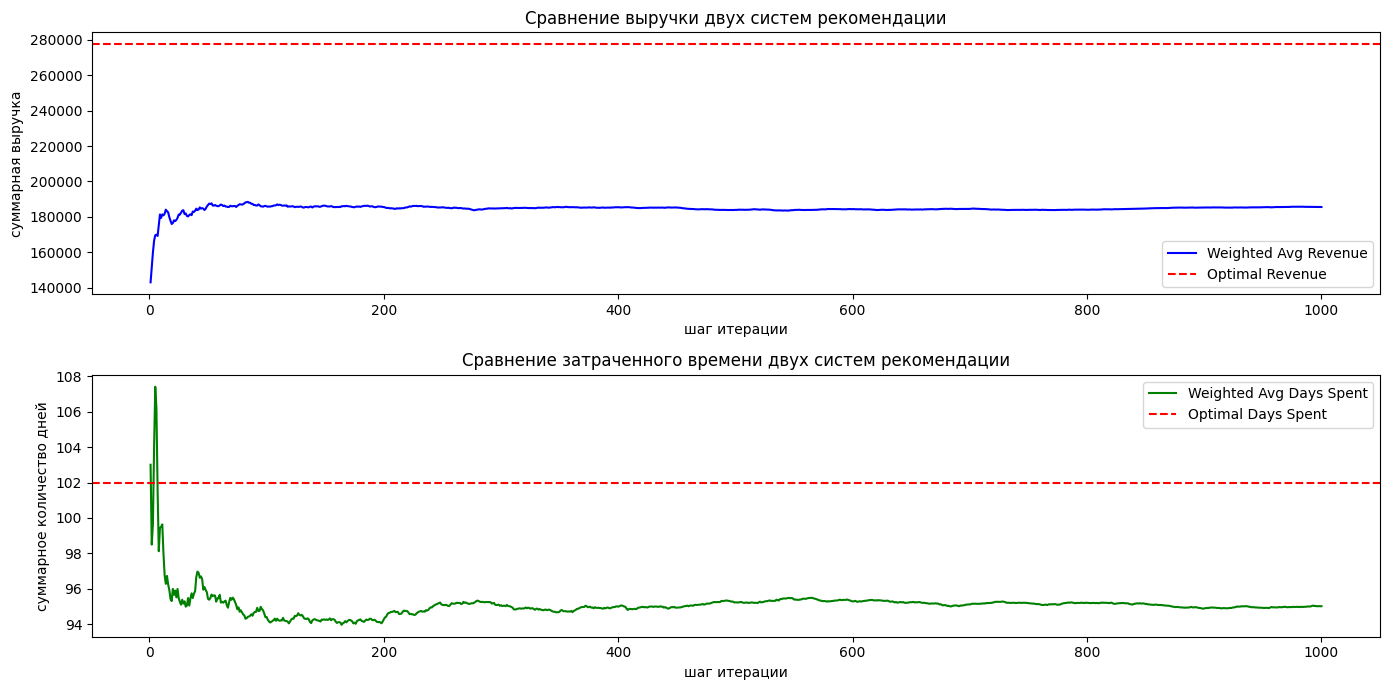

In [229]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from datetime import timedelta

# Данные для оптимальной системы
optimal_revenue = 277500
optimal_days_spent = 102.0

# Списки для хранения накопленных сумм выручки и дней
cumulative_revenue = []
cumulative_days_spent = []

# Списки для взвешенных средних
weighted_avg_revenue = []
weighted_avg_days_spent = []

# Основная функция для 100 прогонов
for run in range(1, 1001):
    tasks_table_with_random_heroes = create_task_table_with_random_heroes(tasks_table, average_duration)
    
    for i in range(len(tasks_table_with_random_heroes) - 1):
        current_row = tasks_table_with_random_heroes.iloc[i]
        current_end_date = current_row['Предполагаемая дата выполнения']
        current_executors = set(current_row['Исполнитель'].split(', '))

        for j in range(i + 1, len(tasks_table_with_random_heroes)):
            next_row = tasks_table_with_random_heroes.iloc[j]
            next_start_date = next_row['Дата поручения']
            
            if current_end_date >= next_start_date:
                next_executors = set(next_row['Исполнитель'].split(', '))

                if current_executors & next_executors:
                    tasks_table_with_random_heroes.at[j, 'Сумма вознаграждения'] = None
    
    # Получаем итоговые значения выручки и дней для текущего прогона
    revenue = tasks_table_with_random_heroes['Сумма вознаграждения'].sum()
    days_spent = tasks_table_with_random_heroes['Затрачено дней'].sum()
    
    # Добавляем значения в накопленные суммы
    cumulative_revenue.append(revenue)
    cumulative_days_spent.append(days_spent)
    
    # Вычисляем взвешенные средние
    weighted_avg_revenue.append(sum(cumulative_revenue) / run)
    weighted_avg_days_spent.append(sum(cumulative_days_spent) / run)


x = list(range(1, 1001))
plt.figure(figsize=(14, 7))

# График для выручки
plt.subplot(2, 1, 1)
plt.plot(x, weighted_avg_revenue, label='Weighted Avg Revenue', color='blue')
plt.axhline(optimal_revenue, color='red', linestyle='--', label='Optimal Revenue')
plt.xlabel('шаг итерации')
plt.ylabel('суммарная выручка')
plt.title('Сравнение выручки двух систем рекомендации')
plt.legend()

# График для затраченных дней
plt.subplot(2, 1, 2)
plt.plot(x, weighted_avg_days_spent, label='Weighted Avg Days Spent', color='green')
plt.axhline(optimal_days_spent, color='red', linestyle='--', label='Optimal Days Spent')
plt.xlabel('шаг итерации')
plt.ylabel('суммарное количество дней')
plt.title('Сравнение затраченного времени двух систем рекомендации')
plt.legend()

plt.tight_layout()
plt.show()


In [230]:
print("Средняя выручка: ", weighted_avg_revenue[-1])
print("Среднее затраченных дней:",weighted_avg_days_spent[-1])

Средняя выручка:  185556.5
Среднее затраченных дней: 95.025


In [283]:
import numpy as np
from scipy import stats


# Вычисление средних значений с помощью numpy
mean_revenue = np.mean(cumulative_revenue)
mean_days_spent = np.mean(cumulative_days_spent)

# T-тест для выручки и дней
t_stat_revenue, p_value_revenue = stats.ttest_1samp(cumulative_revenue, mean_revenue)
t_stat_days, p_value_days = stats.ttest_1samp(cumulative_days_spent, mean_days_spent)

# Результаты
print(f"Средняя выручка: {mean_revenue}")
print(f"T-статистика для выручки: {t_stat_revenue}, p-значение: {p_value_revenue}")
print(f"Среднее количество дней: {mean_days_spent}")
print(f"T-статистика для дней: {t_stat_days}, p-значение: {p_value_days}")

# Интерпретация
alpha = 0.05  # Уровень значимости

if p_value_revenue < alpha:
    print("Средняя выручка статистически значимо отличается от оптимальной выручки.")
else:
    print("Средняя выручка не отличается статистически значимо от рассчитанного среднего значения выручки.")

if p_value_days < alpha:
    print("Среднее количество дней статистически значимо отличается от оптимального количества дней.")
else:
    print("Среднее количество дней не отличается статистически значимо от рассчитанного среднего значения количества дней.")


Средняя выручка: 185556.5
T-статистика для выручки: 0.0, p-значение: 1.0
Среднее количество дней: 95.025
T-статистика для дней: 0.0, p-значение: 1.0
Средняя выручка не отличается статистически значимо от рассчитанного среднего значения выручки.
Среднее количество дней не отличается статистически значимо от рассчитанного среднего значения количества дней.


Рассчитаем среднюю выручку гильдии за день

In [280]:
all_data['Дата выполнения']=all_data['Дата выполнения'].astype(str)
all_data['Дата выполнения']=all_data['Дата выполнения'].apply(safe_parse_date)

# Фильтруем завершенные задачи
completed_tasks = all_data[all_data['Выполнено'] == 'да']

# Вычисляем начало и конец временного промежутка
start_date = completed_tasks['Дата поручения'].min()
end_date = completed_tasks['Дата выполнения'].max()

# Общее количество дней выполнения задач
total_days = (end_date - start_date).days

# Общая сумма вознаграждения
total_reward = completed_tasks['Сумма вознаграждения'].sum()

# Средний доход в день
average_daily_income = total_reward / total_days if total_days > 0 else 0

print(f"Средний доход в день: {average_daily_income}")


Средний доход в день: 7360.307414104883


# Вывод

- В результате, с учётом принятых допущений разработанная рексис в среднем приносит примерно на 100_000 больше выручки, чем система, которая рекомендует героев рандомно.

- Однако разработанная рексис предлагает таких героев, которые в общем завершают все поручения в среднем на 7 дней больше, чем рандомная. 

- В любом случае выгода в количестве сэкономленных дней рандомной системы составляет 7360*7=51520 в денежном выражении, когда как выгода первой системы 100_000. 

## Возможные улучшения

- Поиск лучшего алгоритма для кластеризации заданий
- Алгоритм для расчёта предсказательного количества дней для выполнения задания командой. Это позволит продвигать выше скор команды и выбирать её для выполнения поручения
- Алгоритм действий при переполнении поручений и срыве сроков. В данных условиях поручения достаточно редкие и герои успевают выполнять их и отдохнуть. Однако если будет завал и система не сможет предложить никого, так как все будут заняты, будут проблемы.
- Скрипт, который формирует tasks_table из исходных данных (выполняет кластеризацию с присвоением номера группы)
- Улучшением рексис. Использование более подходящих моделей для анализа описания и извлечения скрытых зависимостей. Графовые нейронные сети могут стать применимы если между героями будет связь или совместная работа, такие связи будут учитываться при подборе героев.